In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising (2).csv')

In [3]:
#Analisando a base de dados, notas-se a ausencia de valores nulos
#Os Dtypes também estão de acordo com o necessário para as operações matematicas que serão feitas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


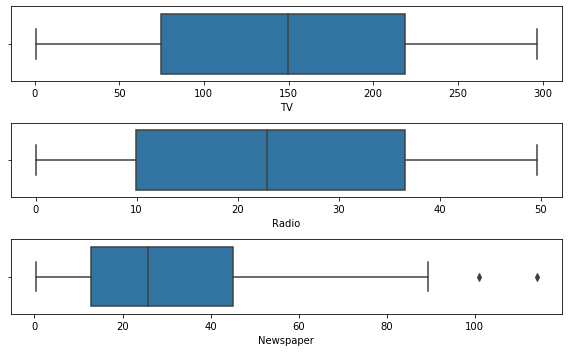

In [4]:
#Plotando boxplot, para verificar a ocorrencia de outliers
fig, axs = plt.subplots(3, figsize=(8,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt3 = sns.boxplot(df['Newspaper'], ax = axs[2])
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70c73d06d0>,
      dtype=object)

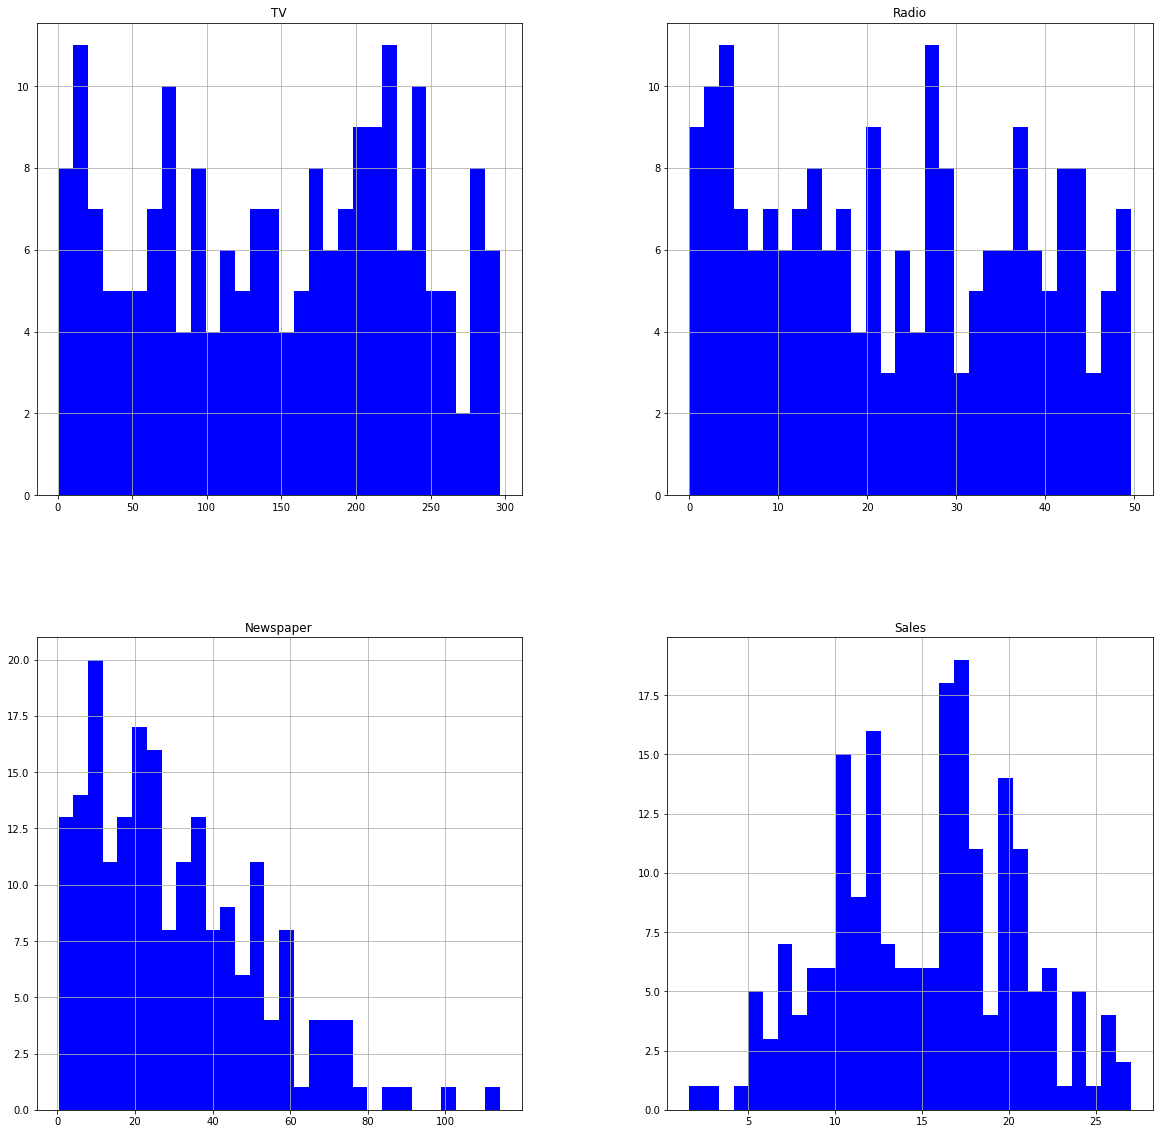

In [5]:
df.hist(bins= 30, figsize=(20,20), color='b')

In [6]:
from scipy import stats
import statsmodels.api as sm
import pylab as py

In [7]:
#Usando teste shapiro wilk para verificar se a amostra pertence a uma distribuição normal

#Hipotese nula: se pvalue > 0,05 a amostra pertence a uma distribuição normal)

#Hipotese alternativa: se pvalue < 0,05 a amostra não pertence a uma distribuição normal
shapiro_test_sales = stats.shapiro(df['Sales'])
shapiro_test_tv = stats.shapiro(df['TV'])
shapiro_test_radio = stats.shapiro(df['Radio'])
shapiro_test_newspaper = stats.shapiro(df['Newspaper'])

In [8]:
shapiro_test_sales = pd.DataFrame(shapiro_test_sales)

In [9]:
shapiro_test_tv = pd.DataFrame(shapiro_test_tv)
shapiro_test_radio = pd.DataFrame(shapiro_test_radio)
shapiro_test_newspaper = pd.DataFrame(shapiro_test_newspaper)

In [10]:
hipotesis = pd.concat([shapiro_test_sales, shapiro_test_tv, shapiro_test_radio, shapiro_test_newspaper], axis=1)

In [11]:
#Todas as fetures pertencem a uma distribuição normal, com exceção da TV

hipotesis

,0,0,0,0
0,0.987524,0.949509,9.440047e-01,9.363999e-01
1,0.076458,0.000002,5.196916e-07,1.127183e-07


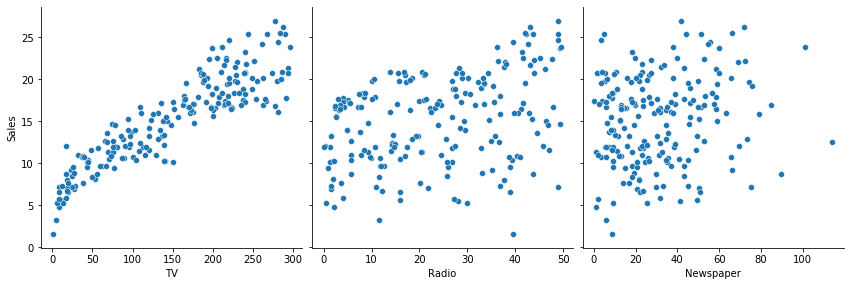

In [12]:
#plotando grafico de dispersão, verificando 
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

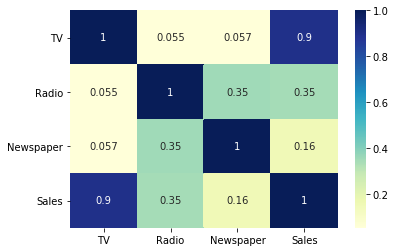

In [13]:
#Plotando grafico de correlação

#podemos ver que há uma forte correlação entre vendas e anuncios na TV
# Portanto, o modelo será contruido para prever vendas com base nos anuncios de TV
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [14]:
#construindo o modelo
# X será nossa variável preditora (Anuncios de TV)
# Y será nossa variável resposta (vendas)

X = df['TV']
y = df['Sales']

In [15]:
# Separando modelo em treino e teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
#Importando modelo de regressão linear
import statsmodels.api as sm


In [17]:
# por padrão, é necessários usar o comando add_constant, para obter o intercepto

X_train_sm = sm.add_constant(X_train)

#Ajustando a reta de regressão pelo metodo dos minimos quadrados ordinários

lr = sm.OLS(y_train, X_train_sm).fit()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        17:59:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0